In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from srim import TRIM, SR, Ion, Layer, Target
from srim.output import Results, Collision
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def ionization_loss_dist(EXYZ):
    widths2= [7,12,12,12,12,12,12]
    df = pd.read_fwf(EXYZ, skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')
    ion_groups=df.groupby(df[0])
    total_elec_energy_loss=[]
    for i in range(1,len(ion_groups)+1):
        ion_num=ion_groups.get_group(i)
        distances_intervals=[]
        avg_stopp_pwr=[]
        x_pos= np.array(ion_num[2].astype(float))
        y_pos= np.array(ion_num[3].astype(float))
        z_pos= np.array(ion_num[4].astype(float))
        elec_stopp_pwr= np.array(ion_num[5].astype(float))
        for j in range(len(x_pos)-1):
            disp_vec= np.array([x_pos[j+1]-x_pos[j],y_pos[j+1]-y_pos[j],z_pos[j+1]-z_pos[j]])
            distances_intervals.append(np.linalg.norm(disp_vec))
        for h in range(len(x_pos)-1):
            avg_stopp_pwr.append((elec_stopp_pwr[h]+elec_stopp_pwr[h+1])/2)
        energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)
        total_losses=np.sum(energy_losses)
        total_elec_energy_loss.append(total_losses)
    return np.array(total_elec_energy_loss)


In [7]:
widths2= [7,12,12,12,12,12,12]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/60 keV_500 simulations_(exyz)/EXYZ.txt', skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')

In [8]:
ion_groups=df.groupby(df[0])

In [9]:
for group_name, group_data in ion_groups:
    print(f"Group name: {group_name}")
    print(group_data)
    print()

Group name: 1
     0           1          2          3          4         5          6
0    1  6.0000E+01        0.0      0.000       0.00  0.008970     0.0000
1    1  5.9716E+01    61363.0    -29.216     269.61  0.008949     1.7286
2    1  5.9335E+01    82504.0    108.550     489.03  0.008921     3.1636
3    1  5.9092E+01    99815.0    -79.912     669.36  0.008902     5.1233
4    1  5.8861E+01   147470.0   -116.840    1481.50  0.008885     2.2745
..  ..         ...        ...        ...        ...       ...        ...
135  1  2.3934E+00  1839200.0 -70545.000 -181570.00  0.001792     4.5670
136  1  5.4928E-01  1844300.0 -58968.000 -187190.00  0.000858  1763.7000
137  1  4.4970E-01  1846900.0 -59386.000 -191510.00  0.000777    90.8470
138  1  1.2897E-02  1847800.0 -61055.000 -195530.00  0.000132   429.9400
139  1  0.0000E+00  1842200.0 -64414.000 -201730.00  0.000000     4.3249

[140 rows x 7 columns]

Group name: 2
     0           1            2          3           4         5       

In [12]:
total_elec_energy_loss=[]
for i in range(1,len(ion_groups)+1):
    ion_num=ion_groups.get_group(i)
    distances_intervals=[]
    avg_stopp_pwr=[]
    x_pos= np.array(ion_num[2].astype(float))
    y_pos= np.array(ion_num[3].astype(float))
    z_pos= np.array(ion_num[4].astype(float))
    elec_stopp_pwr= np.array(ion_num[5].astype(float))
    for j in range(len(x_pos)-1):
        disp_vec= np.array([x_pos[j+1]-x_pos[j],y_pos[j+1]-y_pos[j],z_pos[j+1]-z_pos[j]])
        distances_intervals.append(np.linalg.norm(disp_vec))
    for h in range(len(x_pos)-1):
        avg_stopp_pwr.append((elec_stopp_pwr[h]+elec_stopp_pwr[h+1])/2)
    energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)
    total_losses=np.sum(energy_losses)
    total_elec_energy_loss.append(total_losses)

In [14]:
np.array(total_elec_energy_loss)

array([17054.70789503,  8641.52413079,  8973.85252096, 11002.83207364,
        4488.24120316,  4878.3155    ,  9601.21135401, 12840.66695505,
       15213.14867598, 11021.22436709, 13574.25145967, 15724.34647274,
       15641.85854991, 14142.62339063,  9605.07162932, 10819.19713619,
        7802.52411502, 10564.63338949, 14453.27632366,  6860.00326767,
       13139.94431199,  7102.87206031, 12677.18736877,  7830.16710061,
        6135.61334473, 18355.33824144,  6413.51815719,  7866.63832355,
       17730.28785245,  1277.7031164 , 10304.86946654, 13841.7352702 ,
       14060.80827673, 10460.880289  ,  4665.90133285,  4677.27830665,
        2684.2103128 , 10812.31403494, 10046.02898239, 10000.94343941,
        7551.00971838,  6038.78136978, 10371.40631053, 14461.49817012,
       11744.87758543,  3858.10596034,  9380.15271647, 11048.13369997,
       15443.46559293,  8093.38790084, 14871.23542229,  5539.95242315,
        7165.31628645,  5469.3201533 ,  8826.53997322,  6657.12314409,
      

In [15]:
ionization_loss_dist('C://Users/hep/Desktop/Srim_data_(nathan)/60 keV_500 simulations_(exyz)/EXYZ.txt')

array([17054.70789503,  8641.52413079,  8973.85252096, 11002.83207364,
        4488.24120316,  4878.3155    ,  9601.21135401, 12840.66695505,
       15213.14867598, 11021.22436709, 13574.25145967, 15724.34647274,
       15641.85854991, 14142.62339063,  9605.07162932, 10819.19713619,
        7802.52411502, 10564.63338949, 14453.27632366,  6860.00326767,
       13139.94431199,  7102.87206031, 12677.18736877,  7830.16710061,
        6135.61334473, 18355.33824144,  6413.51815719,  7866.63832355,
       17730.28785245,  1277.7031164 , 10304.86946654, 13841.7352702 ,
       14060.80827673, 10460.880289  ,  4665.90133285,  4677.27830665,
        2684.2103128 , 10812.31403494, 10046.02898239, 10000.94343941,
        7551.00971838,  6038.78136978, 10371.40631053, 14461.49817012,
       11744.87758543,  3858.10596034,  9380.15271647, 11048.13369997,
       15443.46559293,  8093.38790084, 14871.23542229,  5539.95242315,
        7165.31628645,  5469.3201533 ,  8826.53997322,  6657.12314409,
      

<function matplotlib.pyplot.show(close=None, block=None)>

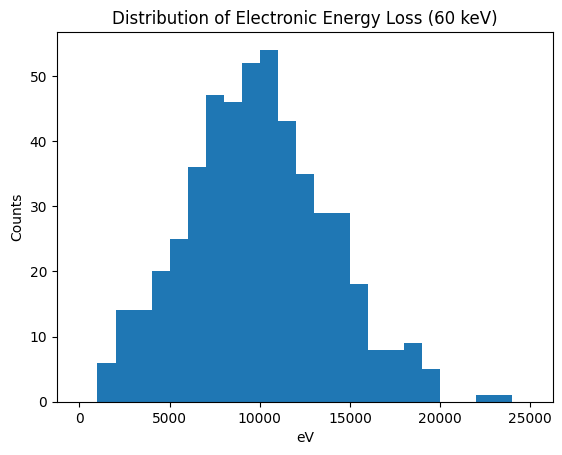

In [11]:
plt.hist(total_elec_energy_loss,range=(0,25000),bins=25)
plt.xlabel('eV')
plt.ylabel('Counts')
plt.title("Distribution of Electronic Energy Loss (60 keV)")
plt.show

In [ ]:
def ionization_loss_dist(EXYZ):
    

In [2]:
widths2= [7,12,12,12,12,12,12]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/80 keV_500 simulations_(exyz)/EXYZ.txt', skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')

In [3]:
ion_groups=df.groupby(df[0])

In [25]:
total_elec_energy_loss=[]
for i in range(1,len(ion_groups)+1):
    ion_num=ion_groups.get_group(i)
    distances_intervals=[]
    avg_stopp_pwr=[]
    x_pos= np.array(ion_num[2].astype(float))
    y_pos= np.array(ion_num[3].astype(float))
    z_pos= np.array(ion_num[4].astype(float))
    elec_stopp_pwr= np.array(ion_num[5].astype(float))
    for j in range(len(x_pos)-1):
        disp_vec= np.array([x_pos[j+1]-x_pos[j],y_pos[j+1]-y_pos[j],z_pos[j+1]-z_pos[j]])
        distances_intervals.append(np.linalg.norm(disp_vec))
    for h in range(len(x_pos)-1):
        avg_stopp_pwr.append((elec_stopp_pwr[h]+elec_stopp_pwr[h+1])/2)
    energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)
    total_losses=np.sum(energy_losses)
    total_elec_energy_loss.append(total_losses)

In [28]:
np.mean(total_elec_energy_loss)

np.float64(12492.04304383559)

<function matplotlib.pyplot.show(close=None, block=None)>

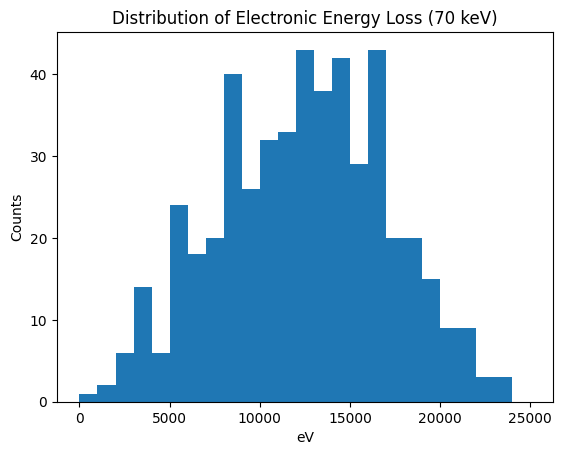

In [27]:
plt.hist(total_elec_energy_loss,range=(0,25000),bins=25)
plt.xlabel('eV')
plt.ylabel('Counts')
plt.title("Distribution of Electronic Energy Loss (70 keV)")
plt.show

In [4]:
widths2= [7,12,12,12,12,12,12]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/80 keV_500 simulations_(exyz)/EXYZ.txt', skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')

In [5]:
ion_groups=df.groupby(df[0])

In [6]:
total_elec_energy_loss=[]
for i in range(1,len(ion_groups)+1):
    ion_num=ion_groups.get_group(i)
    distances_intervals=[]
    avg_stopp_pwr=[]
    x_pos= np.array(ion_num[2].astype(float))
    y_pos= np.array(ion_num[3].astype(float))
    z_pos= np.array(ion_num[4].astype(float))
    elec_stopp_pwr= np.array(ion_num[5].astype(float))
    for j in range(len(x_pos)-1):
        disp_vec= np.array([x_pos[j+1]-x_pos[j],y_pos[j+1]-y_pos[j],z_pos[j+1]-z_pos[j]])
        distances_intervals.append(np.linalg.norm(disp_vec))
    for h in range(len(x_pos)-1):
        avg_stopp_pwr.append((elec_stopp_pwr[h]+elec_stopp_pwr[h+1])/2)
    energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)
    total_losses=np.sum(energy_losses)
    total_elec_energy_loss.append(total_losses)

<function matplotlib.pyplot.show(close=None, block=None)>

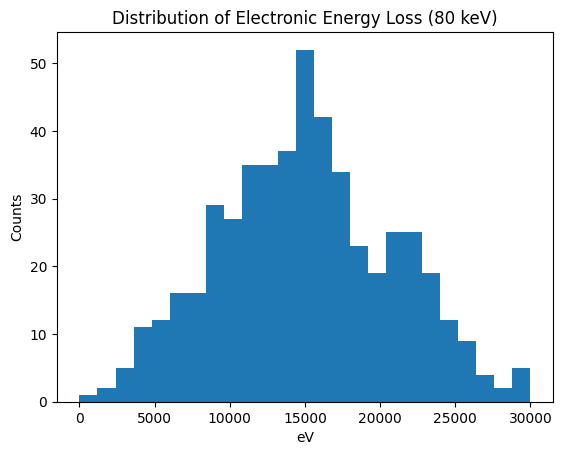

In [8]:
plt.hist(total_elec_energy_loss,range=(0,30000),bins=25)
plt.xlabel('eV')
plt.ylabel('Counts')
plt.title("Distribution of Electronic Energy Loss (80 keV)")
plt.show